<a href="https://colab.research.google.com/github/yerrayyareddy/Guided-Project_Linear-Regression/blob/main/Guided_Project_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
#from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset =pd.read_csv("/content/CarPrice_project.csv")

In [3]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
dataset.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [6]:
len(dataset[dataset.duplicated()])

0

In [7]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Exploratory Data Analysis

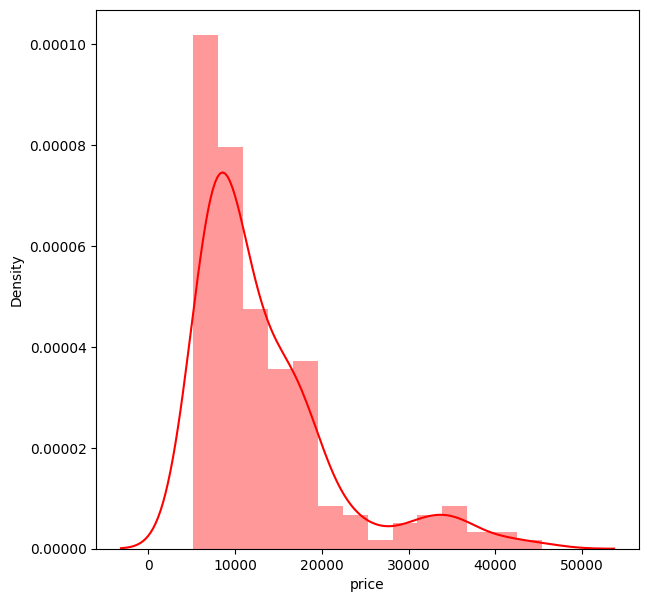

In [8]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['price'],color='r')
plt.show()

In [9]:
numeric_features=dataset.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

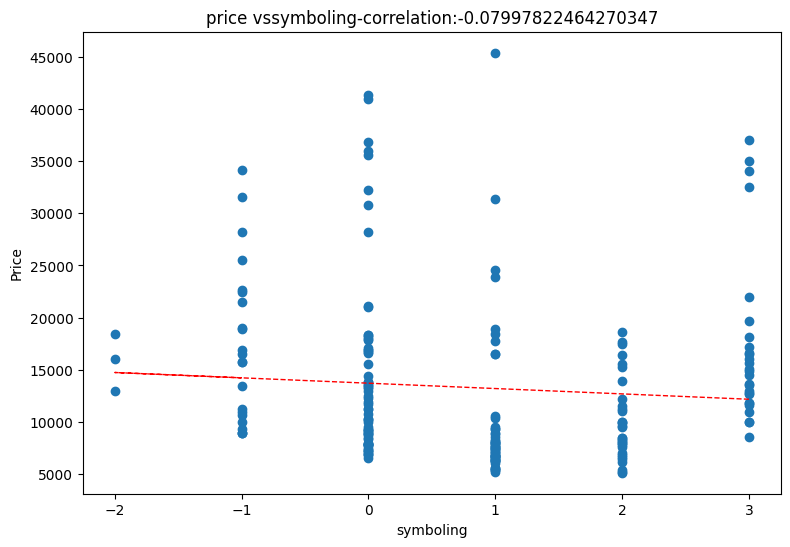

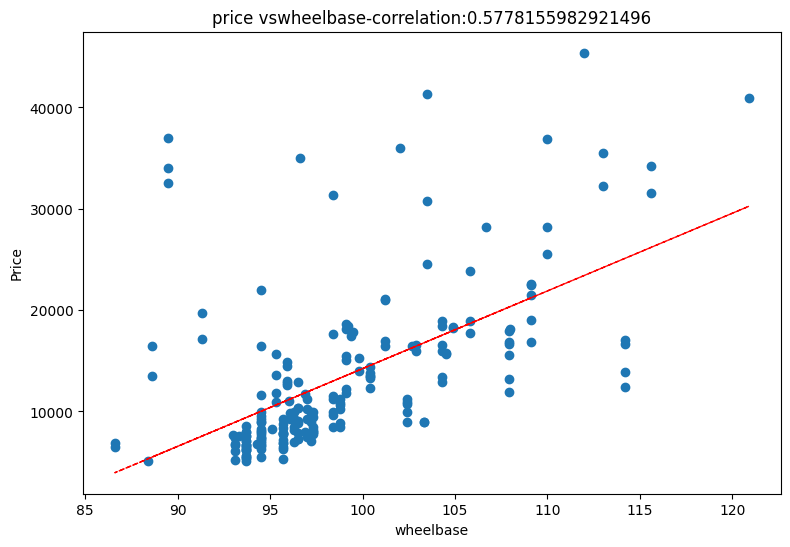

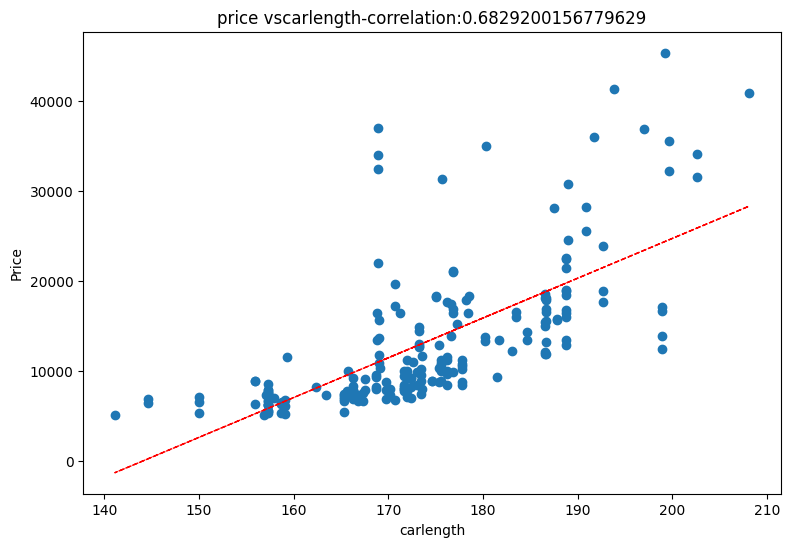

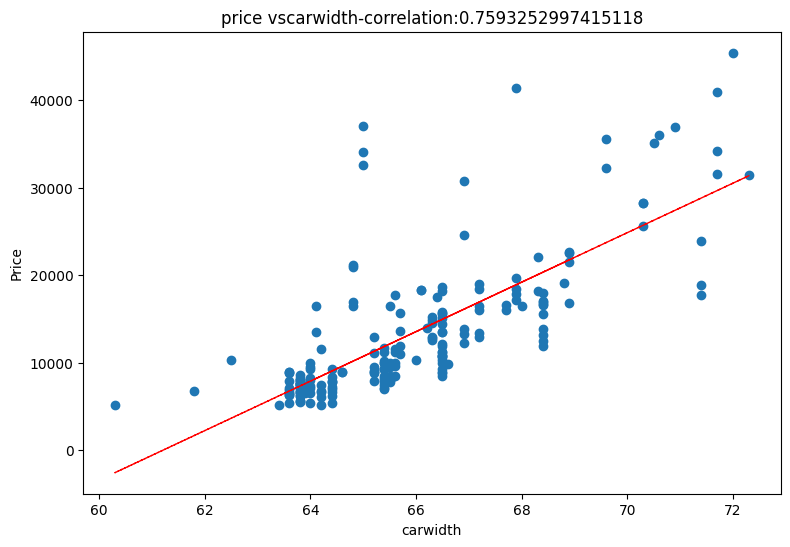

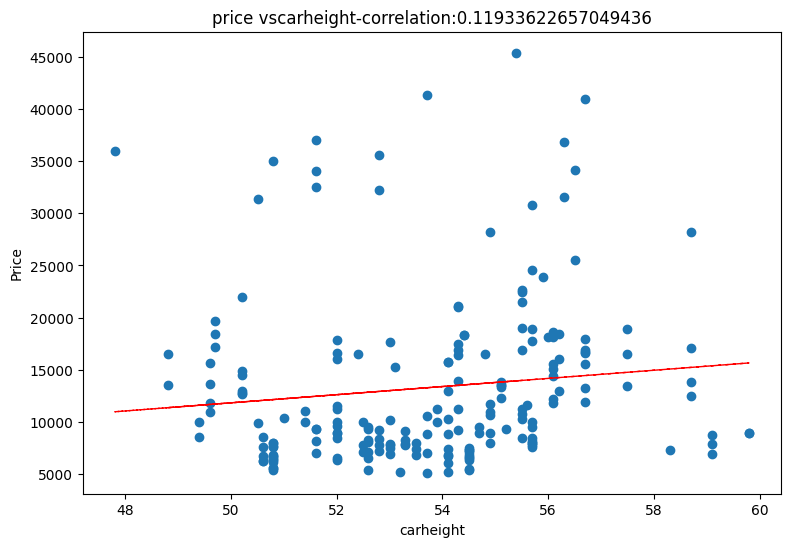

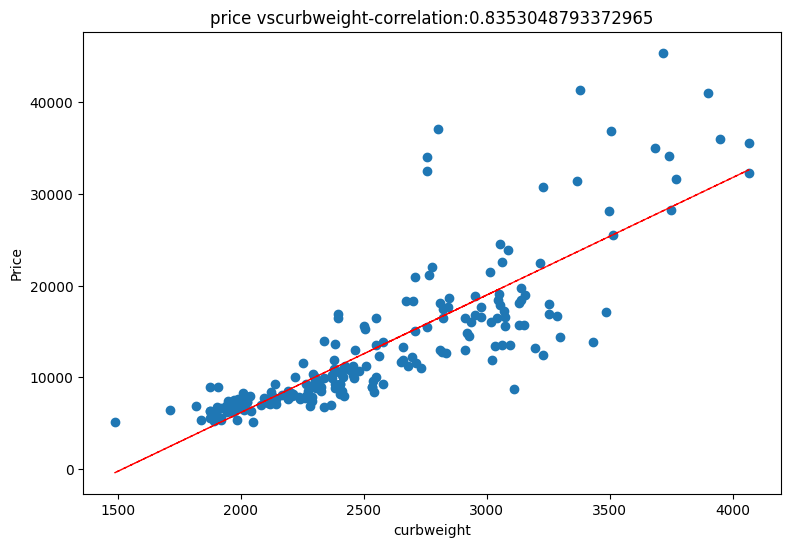

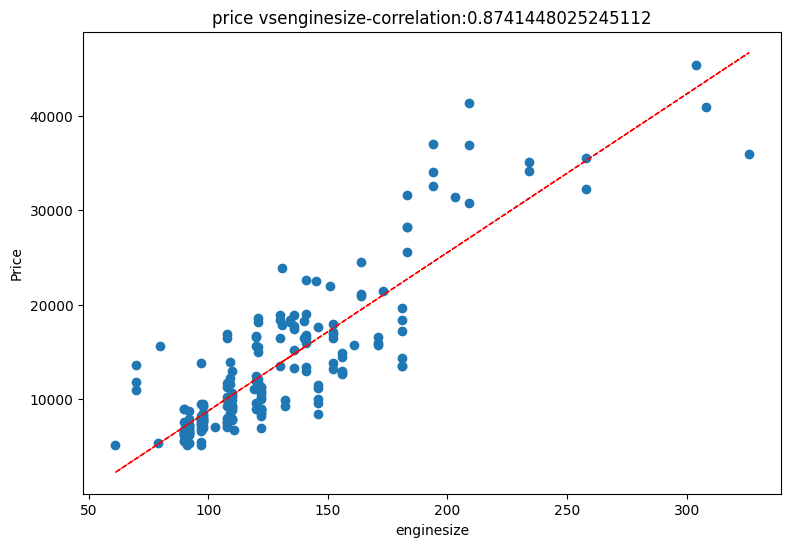

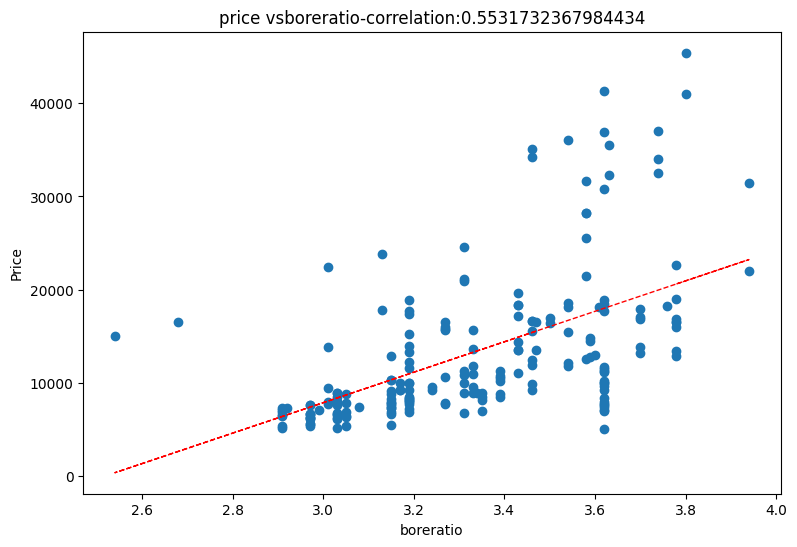

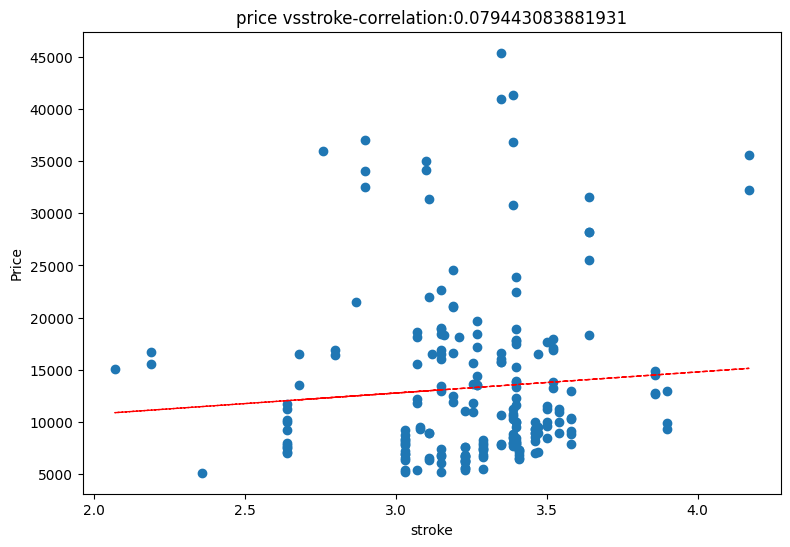

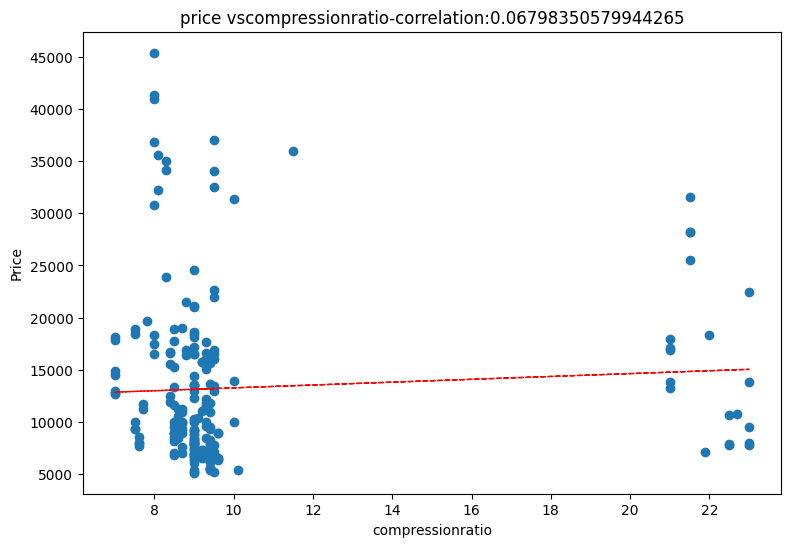

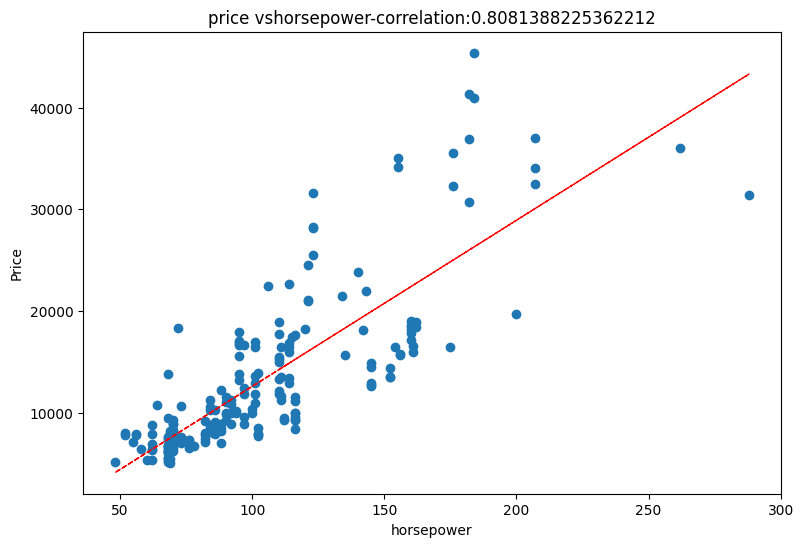

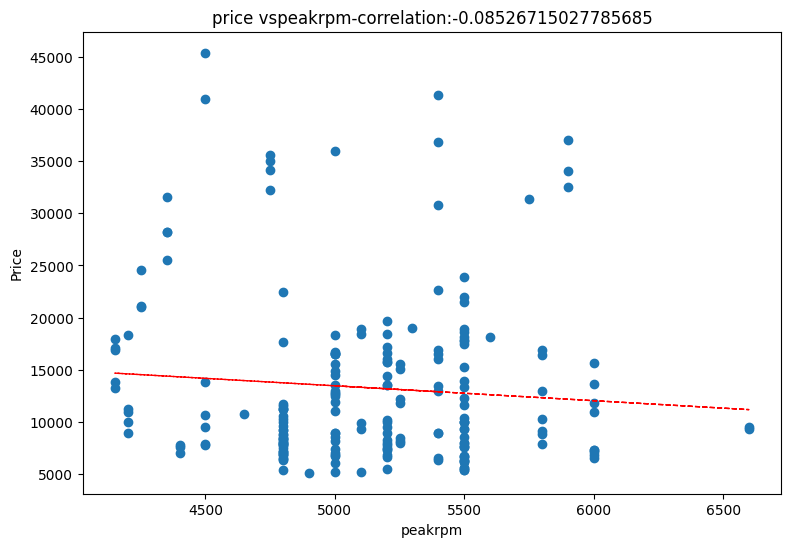

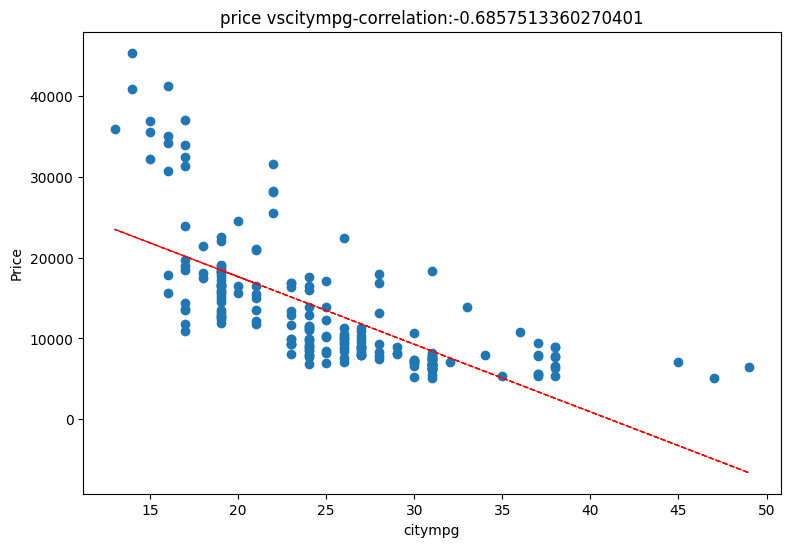

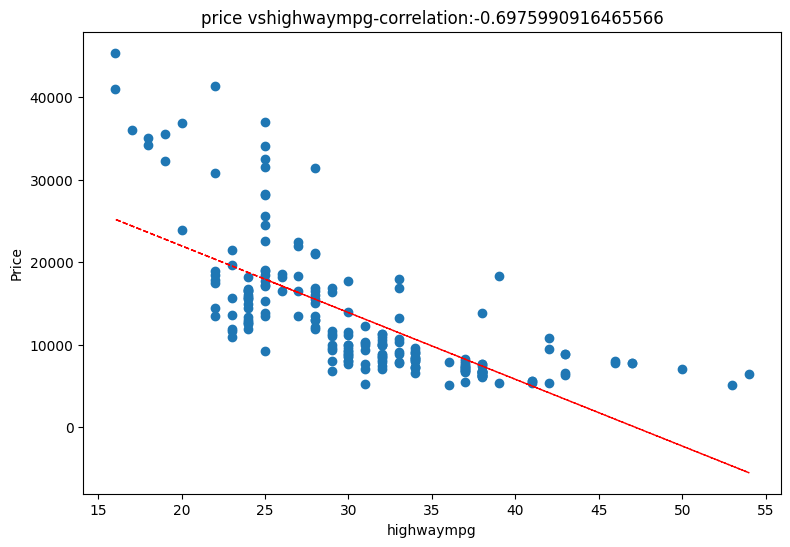

In [10]:
from pandas.tseries.offsets import LastWeekOfMonth
for col in numeric_features[1:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=dataset[col]
  label=dataset['price']
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('price vs'+col+'-correlation:'+str(correlation))
  z=np.polyfit(dataset[col],dataset['price'],1)
  y_hat=np.poly1d(z)(dataset[col])
  plt.plot(dataset[col],y_hat,'r--',lw=1)
plt.show()

<Axes: >

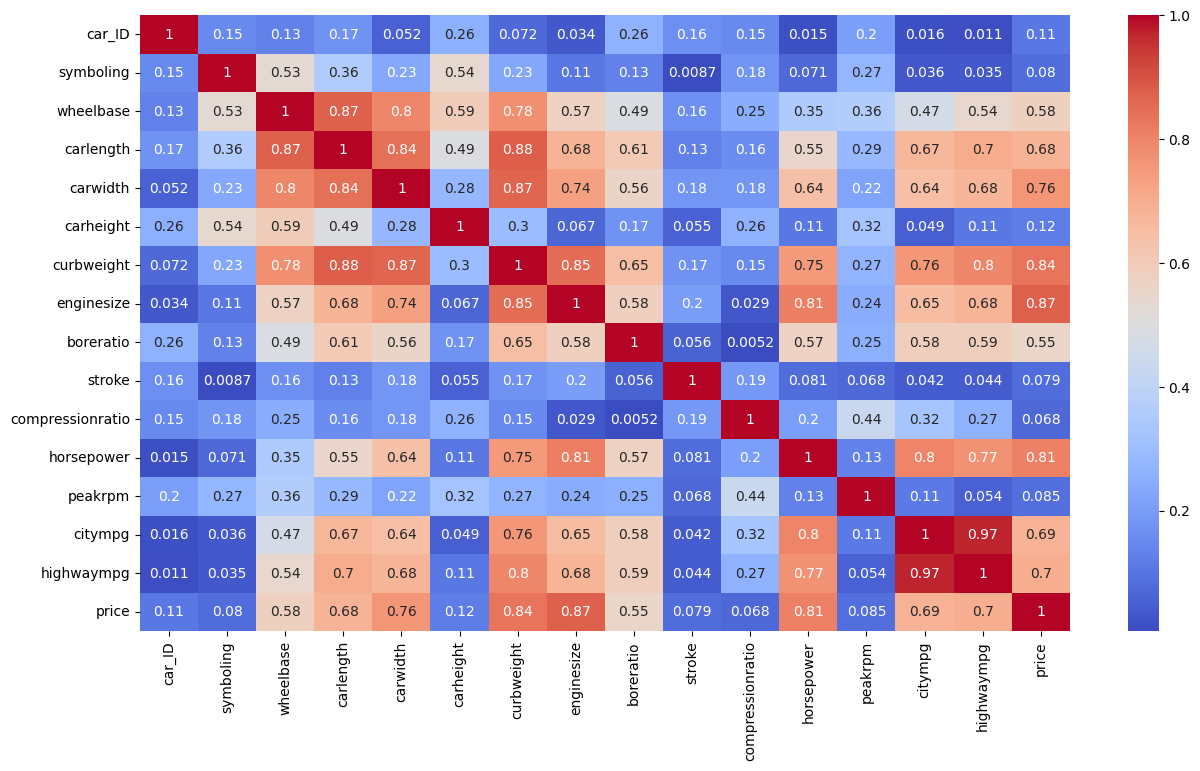

In [11]:
plt.figure(figsize=(15,8))
correlation = dataset.select_dtypes(include=np.number).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [12]:
dataset['mileage']=0.6*dataset['citympg']+0.4*dataset['highwaympg']
dataset['car_area']=dataset['carlength']*dataset['carwidth']
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,23.4,10820.08
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,23.4,10820.08
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,21.8,11213.60
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,26.4,11690.92
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,19.6,11726.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,25.0,13008.32
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,21.4,12989.44
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,20.0,13008.32
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,26.4,13008.32


In [13]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif=pd.DataFrame()
  vif['variables']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(vif)

In [14]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['price','car_ID']]])

,variables,VIF
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


In [15]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','carlength','carwidth','citympg','highwaympg','wheelbase','carheight','car_area']]])

,variables,VIF
0,symboling,1.814953
1,curbweight,198.427552
2,enginesize,65.617706
3,boreratio,187.712520
4,stroke,112.853620
5,compressionratio,15.189976
6,horsepower,48.625774
7,peakrpm,137.896263
8,mileage,65.810022


In [16]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight','compressionratio']]])

,variables,VIF
0,symboling,1.420298
1,enginesize,4.293591
2,mileage,4.534744


In [17]:
numerical_features=['enginesize','mileage','symboling']

In [18]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [19]:
dataset['company']=dataset['CarName'].str.split(" ",expand=True)[0]
dataset['company']=dataset['company'].replace({'toyouta':'Tyota','vw':'Volkswagen','vokswagen':'Volkswagen','maxda':'Mazda','porchce':'Porsche'})
dataset['company']=dataset['company'].str.title()
dataset['company'].value_counts()

,count
company,
Toyota,31
Nissan,18
Mazda,17
Honda,13
Mitsubishi,13
Subaru,12
Volkswagen,12
Volvo,11
Peugeot,11


In [20]:
categorical_features=dataset.describe(include=['object','category']).columns

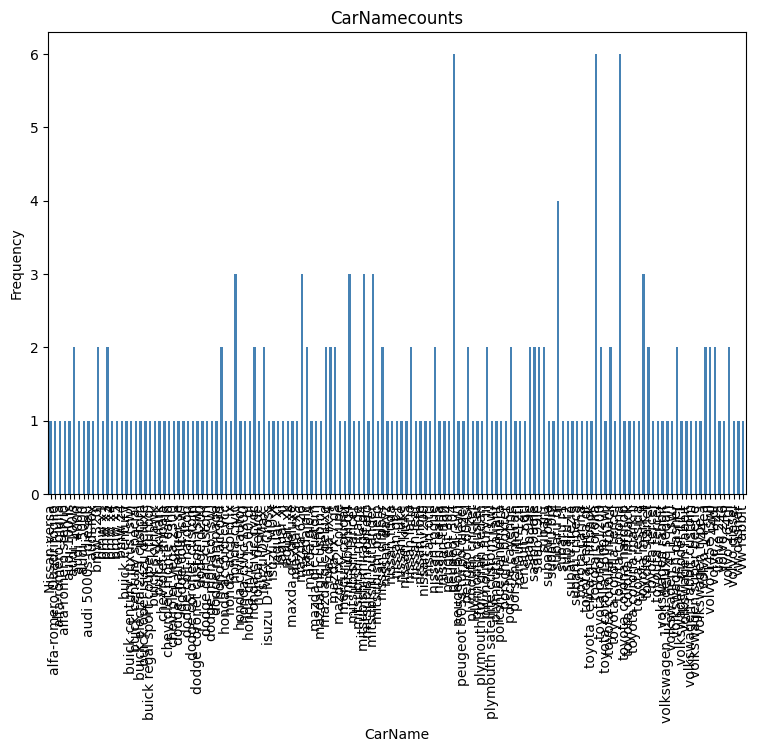

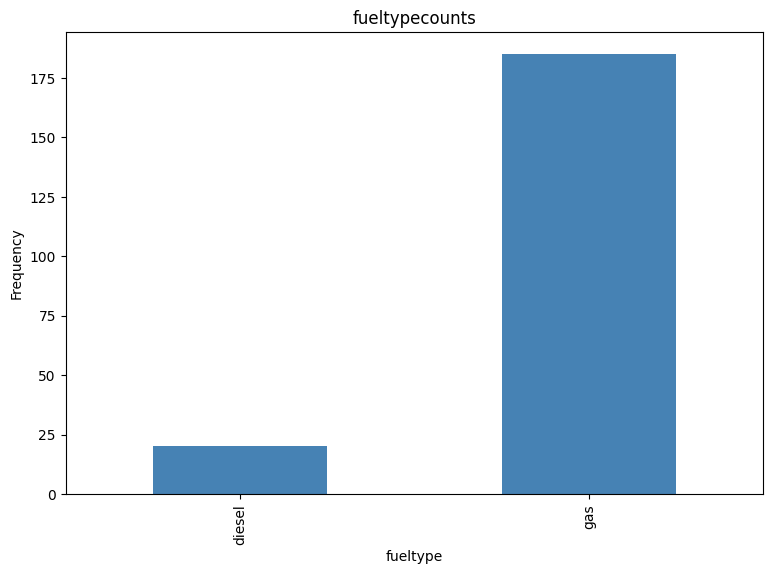

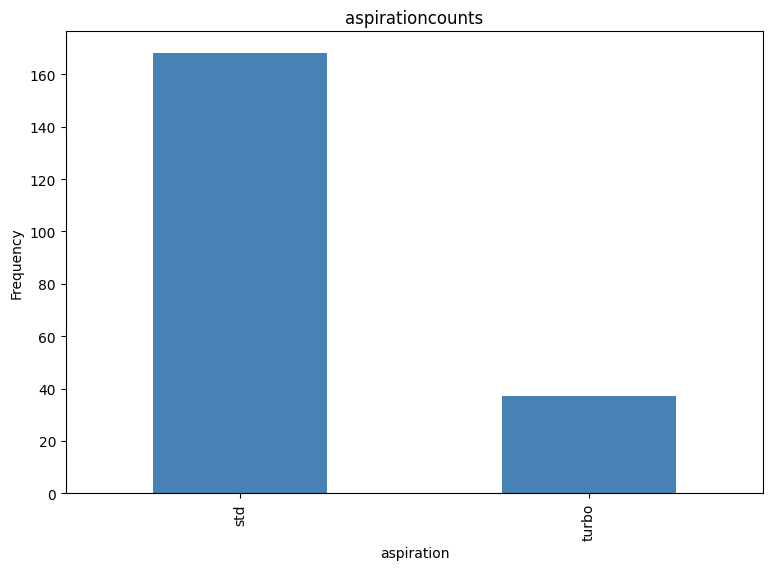

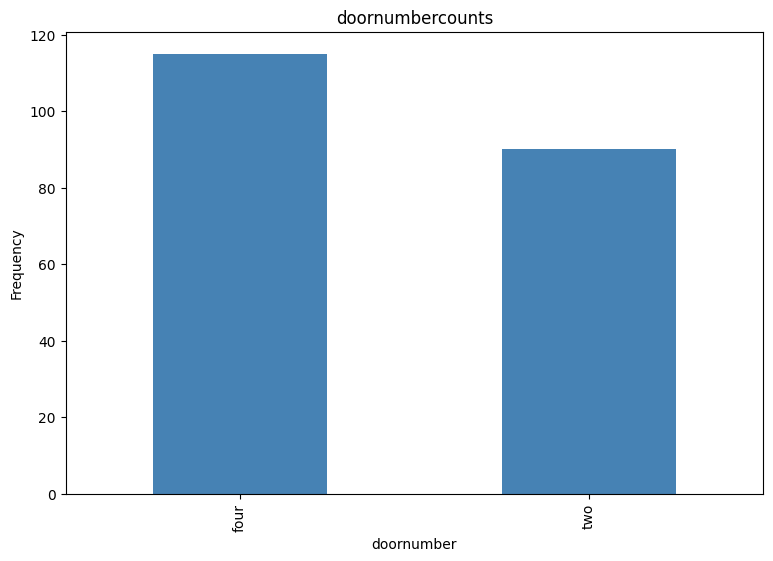

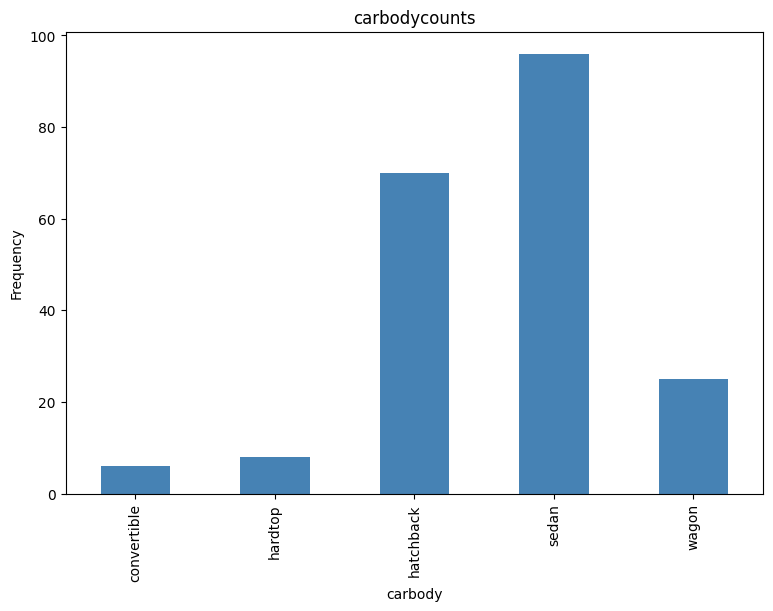

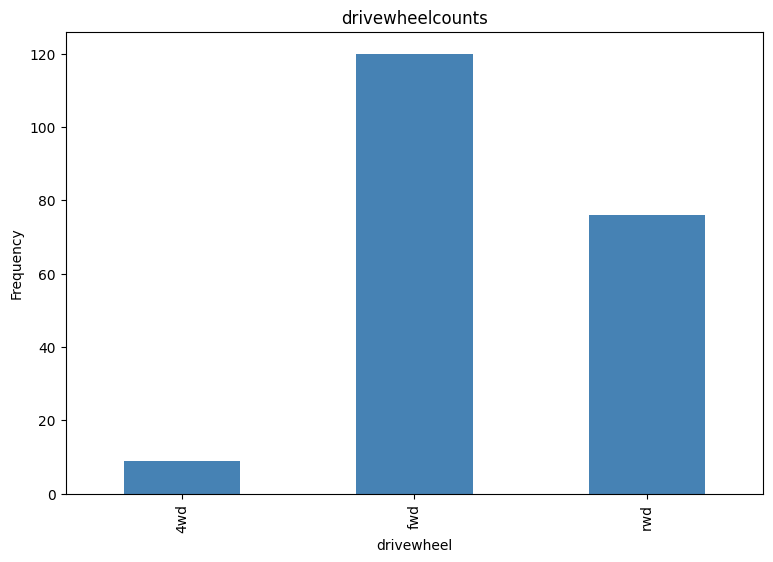

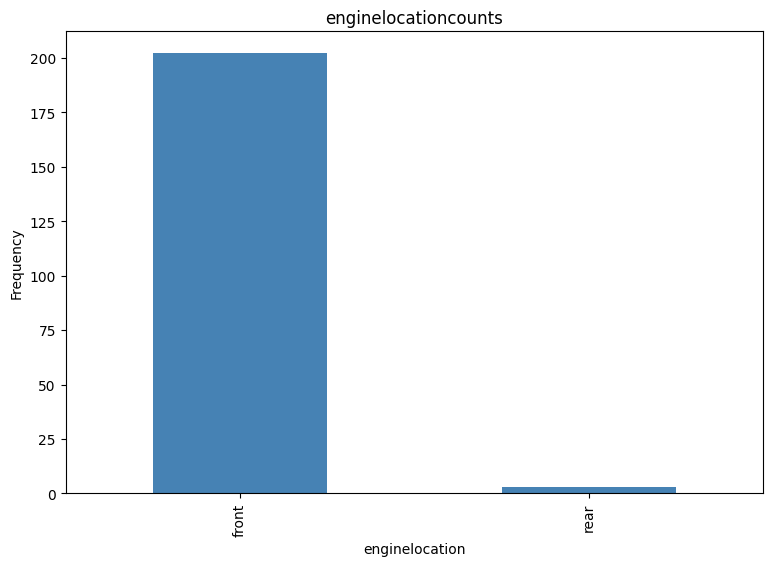

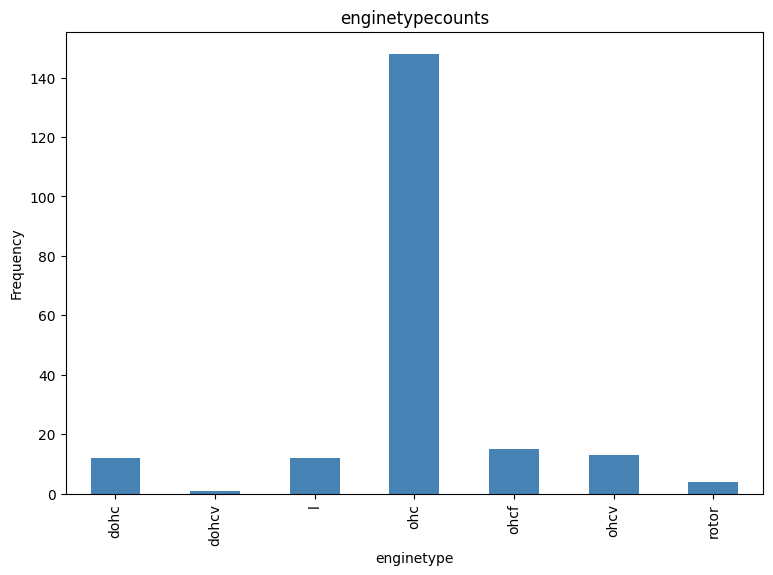

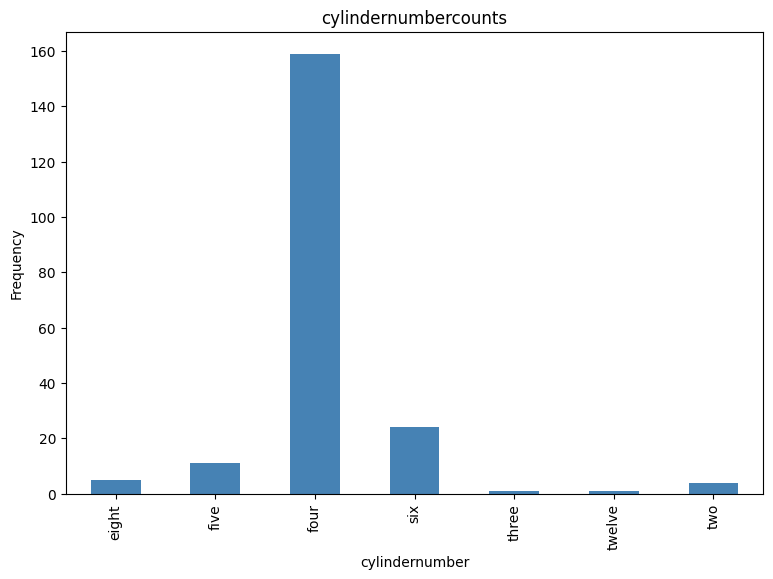

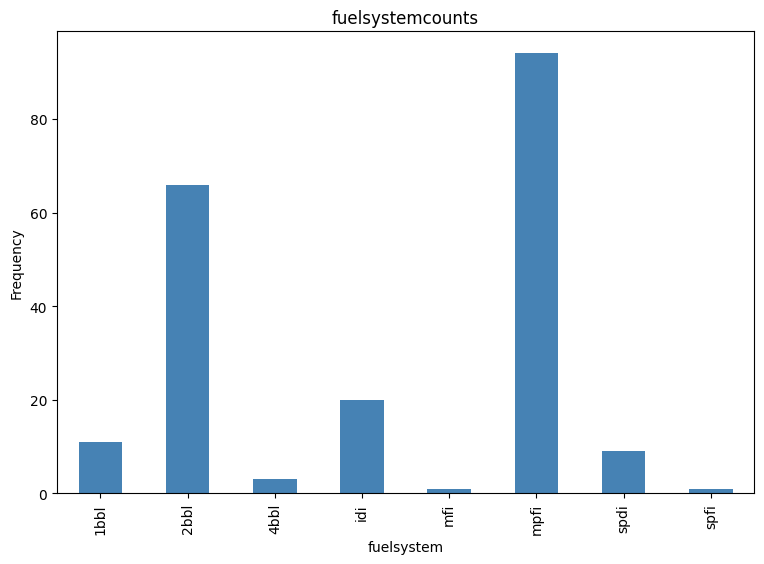

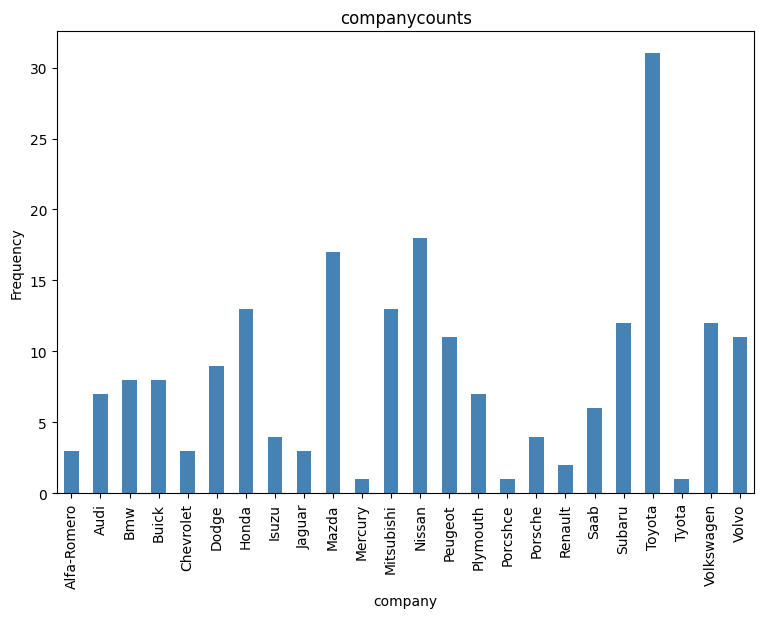

In [21]:
for col in categorical_features:
  counts = dataset[col].value_counts().sort_index()
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  counts.plot.bar(ax=ax, color='steelblue')
  ax.set_title(col + 'counts')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
plt.show()

In [22]:
dataset["enginelocation"].value_counts()

,count
enginelocation,
front,202
rear,3


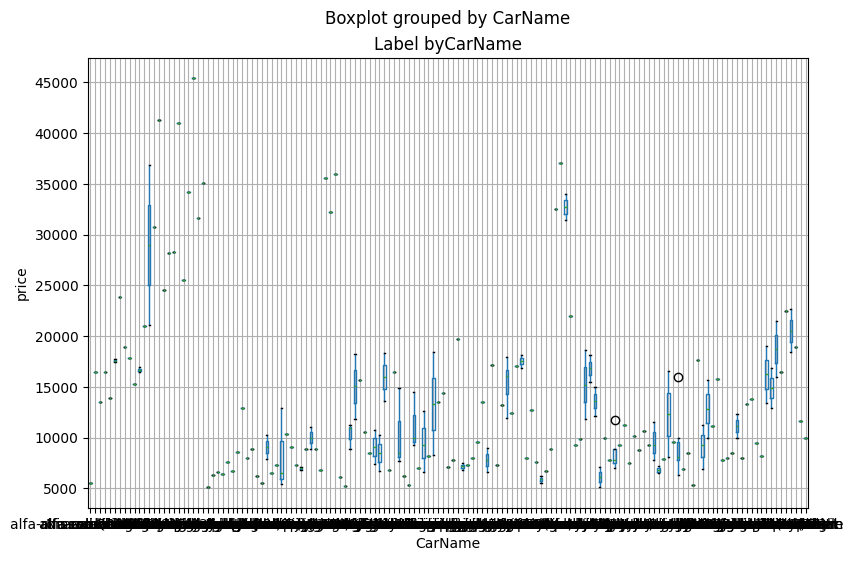

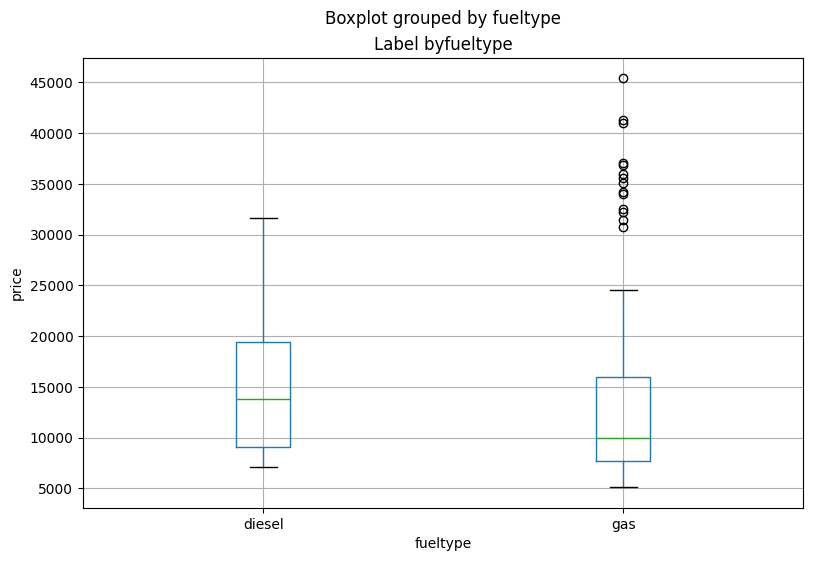

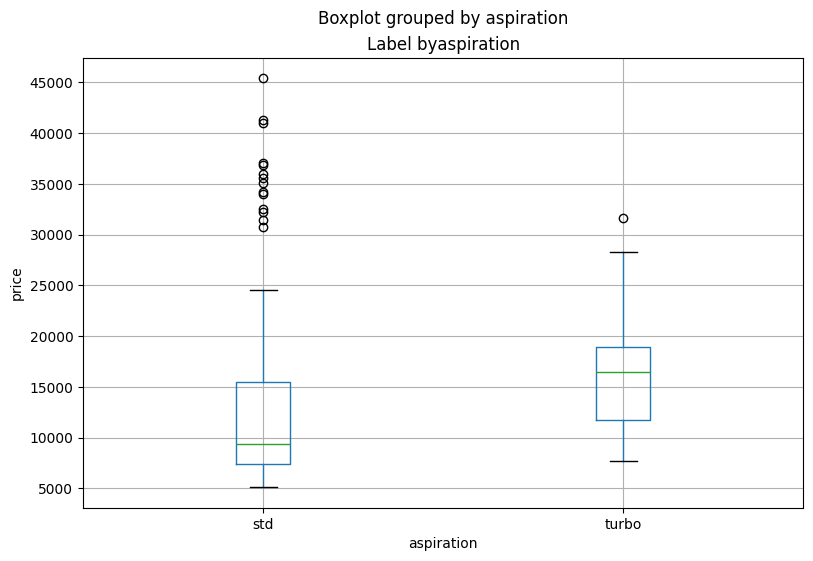

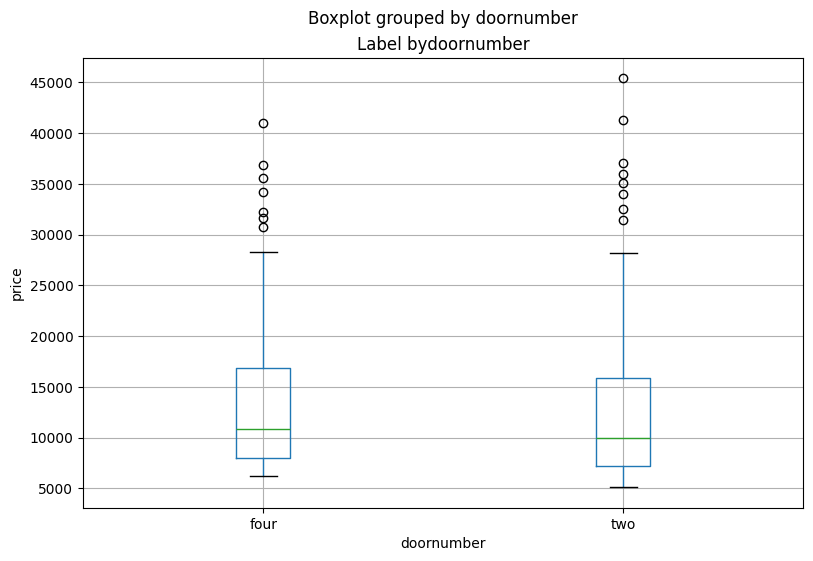

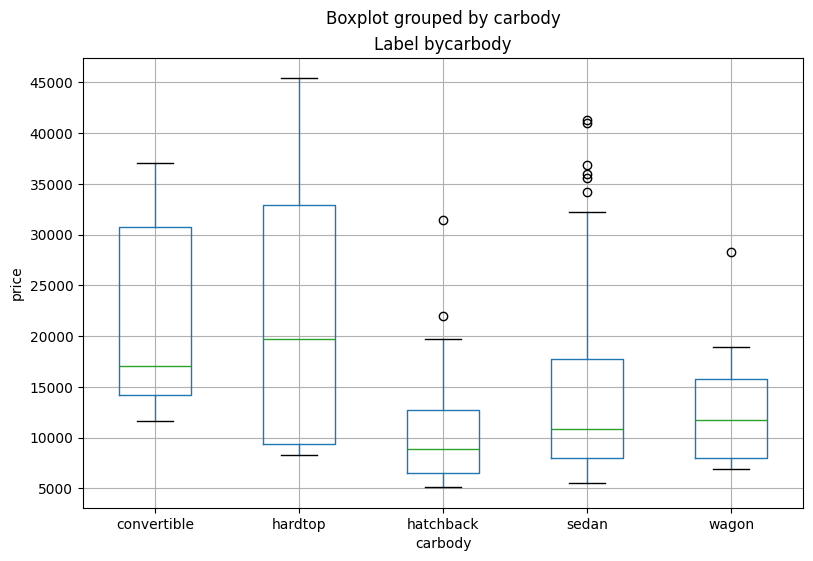

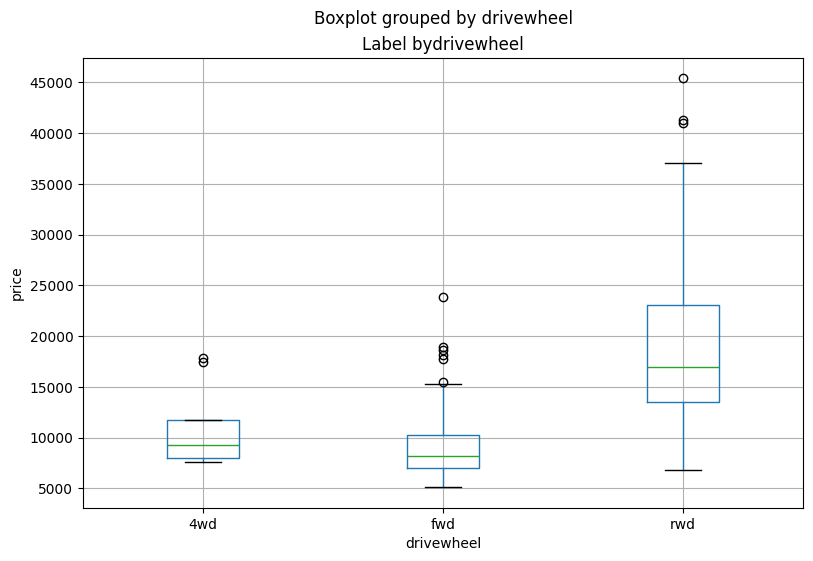

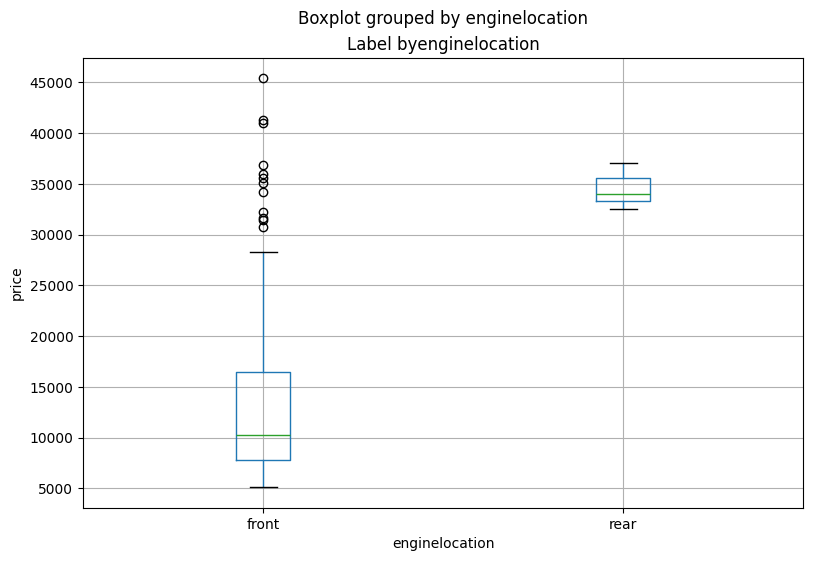

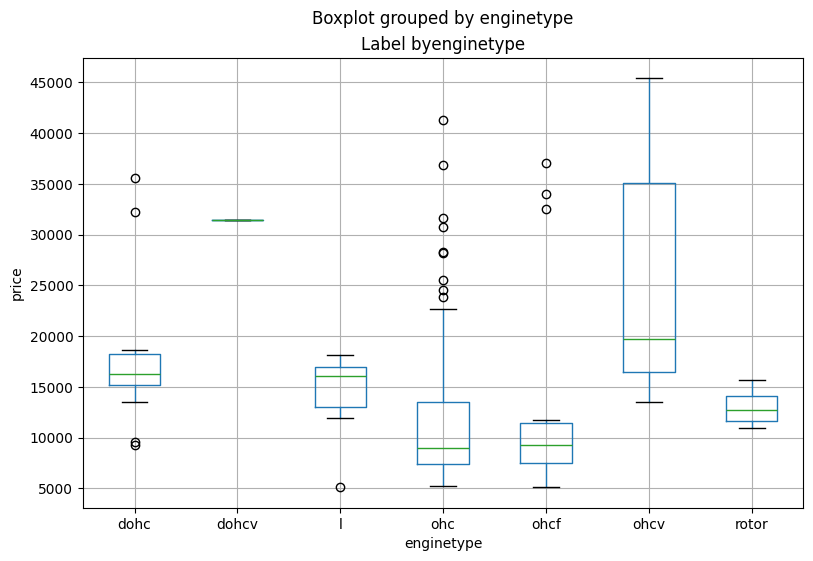

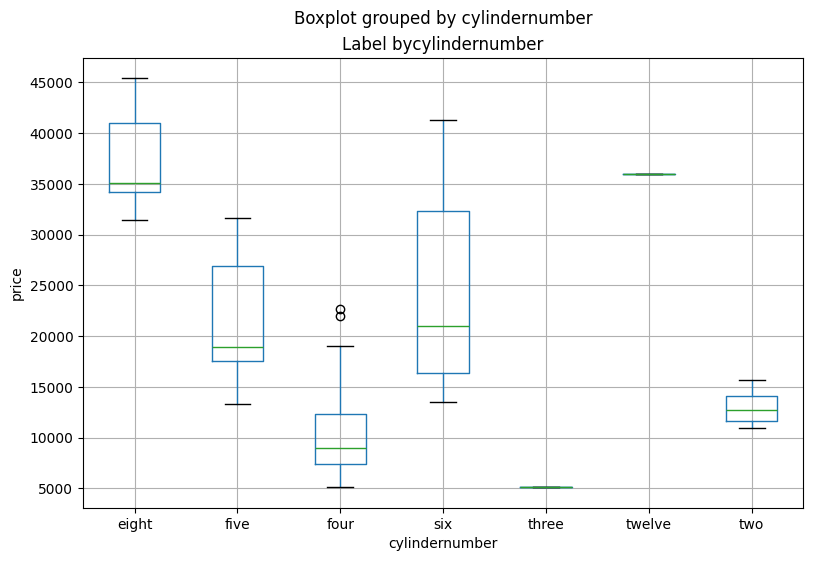

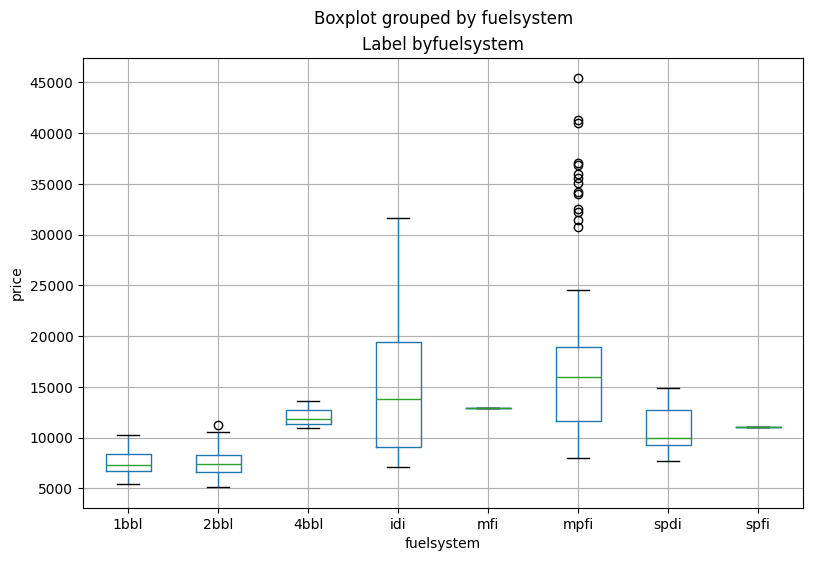

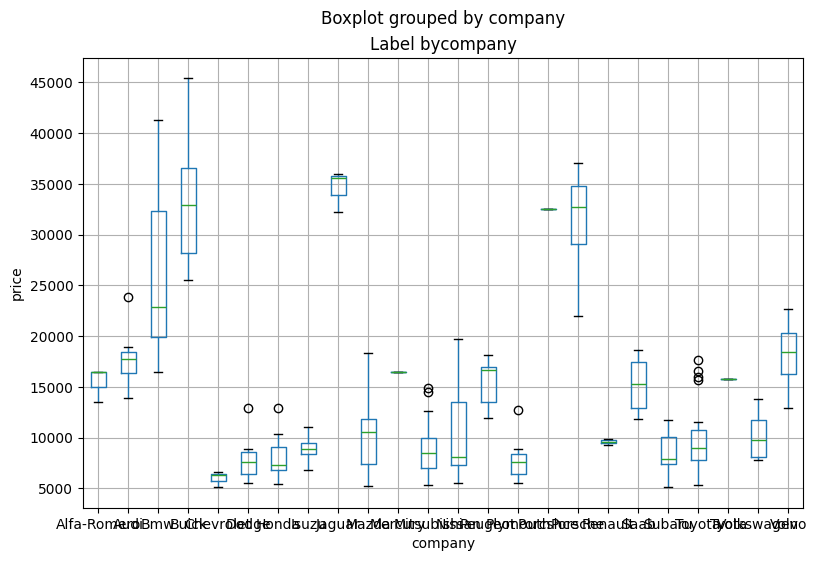

In [23]:
for col in categorical_features:
  fig =plt.figure(figsize=(9, 6))
  ax=fig.gca()
  dataset.boxplot(column='price', by=col, ax=ax)
  ax.set_title('Label by'+col)
  ax.set_ylabel('price')
  plt.show()

<Figure size 2000x600 with 0 Axes>

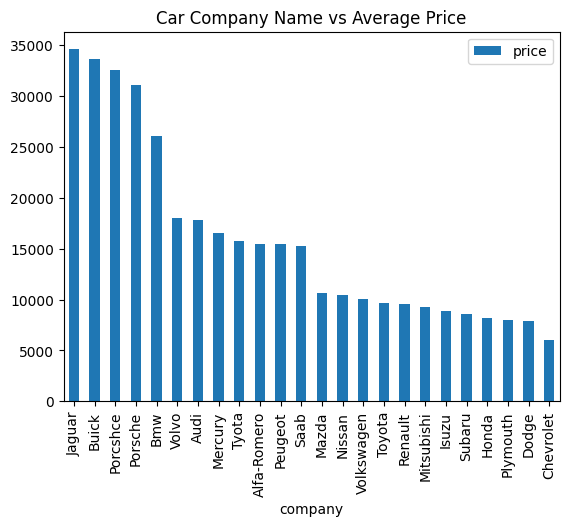

In [24]:
plt.figure(figsize=(20,6))
df_autox=pd.DataFrame(dataset.groupby(['company'])['price'].mean().sort_values(ascending=False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [25]:
df_autox.rename(columns={'price':'price_mean'},inplace=True)

In [26]:
dataset=dataset.merge(df_autox,on='company',how='left')

In [27]:
dataset['company_cat']=dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <=x<24000 else 2))

In [28]:
dataset["company_cat"].value_counts()

,count
company_cat,
0,141
1,40
2,24


In [29]:
correlation.price

,price
car_ID,-0.109093
symboling,-0.079978
wheelbase,0.577816
carlength,0.682920
carwidth,0.759325
carheight,0.119336
curbweight,0.835305
enginesize,0.874145
boreratio,0.553173
stroke,0.079443


In [30]:
dataset_pr=dataset.copy()

In [31]:
encoder_nums={'fueltype':{'diesel':1,'gas':0},
              'aspiration':{'turbo':1,'std':0},
              'doornumber':{'two':2,'four':4},
              'drivewheel':{'fwd':0,'rwd':1,'4wd':0},
              'cylindernumber':{'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3}}
dataset_pr=dataset_pr.replace(encoder_nums)


In [32]:
dataset_pr=dataset_pr.replace(encoder_nums)


In [33]:
dataset_pr=pd.get_dummies(dataset_pr,columns=["carbody","enginetype","fuelsystem"],prefix=["body","etype","fsystem"])
dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,...,True,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,0,0,4,0,front,99.8,176.6,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,0,0,4,0,front,99.4,176.6,...,False,False,False,False,False,False,False,True,False,False


In [34]:
features= numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
                 'body_hardtop','body_hatchback','body_sedan','body_wagon','etype_dohc','etype_l','etype_ohc','etype_ohcf','etype_ohcv',
                 'fsystem_1bbl','fsystem_2bbl','fsystem_idi','fsystem_mpfi','fsystem_spdi'])

In [35]:
features

['enginesize',
 'mileage',
 'symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [36]:
len(features)

24

In [37]:
encoder_nums['enginelocation'] = {'front':0,'rear':1}
dataset_pr=dataset_pr.replace(encoder_nums)
from scipy.stats import zscore
X=dataset_pr[features].apply(zscore)

In [38]:
y=np.log10(dataset_pr['price'])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(164, 24)
(41, 24)


In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.932910547814374

In [41]:
reg.coef_

array([ 0.07541644, -0.055121  ,  0.00779818,  0.0107034 ,  0.02091038,
        0.01968004,  0.0160937 ,  0.00241935,  0.06462313,  0.01285395,
       -0.00023771, -0.00031553,  0.00069452, -0.0070823 , -0.04097518,
       -0.05179258, -0.06399773, -0.03568903, -0.04397545,  0.0017689 ,
       -0.01416828,  0.0107034 ,  0.02116191, -0.00750663])

In [42]:
len(reg.coef_)

24

In [43]:
reg.intercept_

np.float64(4.060209581141083)

In [44]:
y_pred=reg.predict(X_test)
y_pred

array([3.81604043, 4.22812887, 4.17776127, 3.5578771 , 4.01448648,
       4.08936386, 3.78414892, 3.87024112, 4.1682792 , 3.87435626,
       4.32497037, 4.56731383, 4.11242044, 4.06199893, 3.79801442,
       4.08992595, 4.0389786 , 4.18810488, 3.9190835 , 3.85751198,
       3.97778475, 4.13243992, 4.03285514, 4.08992595, 4.15935608,
       3.84566887, 3.87251473, 4.10940483, 3.89044968, 3.83232252,
       3.96316829, 3.9872267 , 4.3269846 , 3.99759724, 3.8719786 ,
       4.45164893, 4.07596662, 4.1718395 , 3.81422496, 4.62464894,
       3.76463572])

In [45]:
y_test

,price
52,3.832189
181,4.197281
5,4.183270
18,3.711892
188,3.999783
170,4.049179
76,3.731508
154,3.897517
104,4.235503
33,3.814847


In [46]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(10**(y_test),10**( y_pred))
print("MSE:",MSE)
RMSE =np.sqrt(MSE)
print("RMSE:",RMSE)

MSE: 8811547.104707833
RMSE: 2968.4250209004495


In [47]:
from sklearn.metrics import r2_score
r2=r2_score(10**(y_test),10**( y_pred))
print("R2 :",r2)
print("Adjusted R2:",1-(1-r2_score(10**(y_test),10**(y_pred)))*((X_test.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

R2 : 0.8861797776715585
Adjusted R2: 0.96724597918606


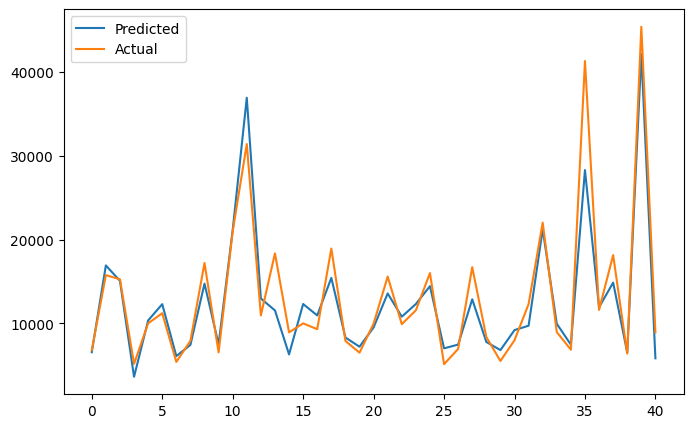

In [48]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [50]:
lasso.score(X_train, y_train)

0.9328392974458276

In [51]:
lasso.coef_

array([ 0.07462283, -0.05595893,  0.00761409,  0.0195497 ,  0.02018548,
        0.0192412 ,  0.01621925,  0.0009635 ,  0.06523688,  0.01267616,
       -0.        , -0.        ,  0.00107811, -0.00685222, -0.03634398,
       -0.04752198, -0.05584521, -0.03075373, -0.03841615,  0.        ,
       -0.01773296,  0.        ,  0.01715003, -0.00878973])

In [52]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [53]:
print("The best fit alpha value is found out to be :",lasso_regressor.best_params_)
print("\nUsing",lasso_regressor.best_params_,"the negative mean squared error is: ",lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using {'alpha': 0.0014} the negative mean squared error is:  -0.00470512245447327


In [54]:
y_pred_lasso =lasso_regressor.predict(X_test)

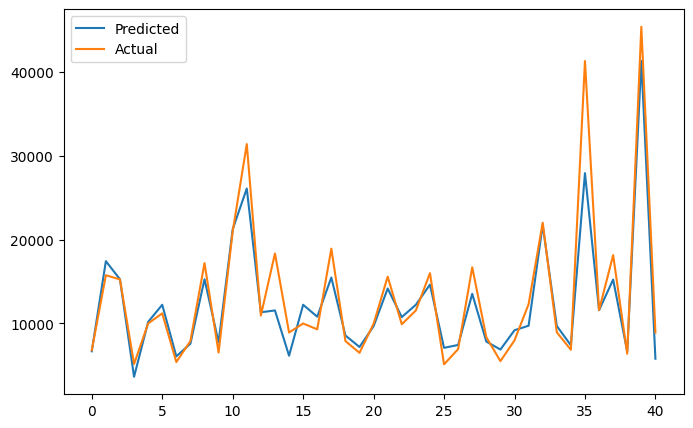

In [55]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(10**(y_test),10**( y_pred_lasso))
print("MSE:",MSE)
RMSE =np.sqrt(MSE)
print("RMSE:",RMSE)

r2=r2_score(10**(y_test),10**( y_pred_lasso))
print("R2 :",r2)
print("Adjusted R2:",1-(1-r2_score(10**(y_test),10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE: 8749217.095852563
RMSE: 2957.9075536352657
R2 : 0.8869849047827614
Adjusted R2: 0.9674776704410825


In [57]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [58]:
print("The best fit alpha value is found out to be:", ridge_regressor.best_params_)
print("\nUsing",ridge_regressor.best_params_,"the negative mean squared error is: ",ridge_regressor.best_score_)

The best fit alpha value is found out to be: {'alpha': 5}

Using {'alpha': 5} the negative mean squared error is:  -0.005059112244366462


In [59]:
y_pred_ridge=ridge_regressor.predict(X_test)

In [60]:
MSE = mean_squared_error(10**(y_test),10**( y_pred_ridge))
print("MSE:",MSE)
RMSE =np.sqrt(MSE)
print("RMSE:",RMSE)

r2=r2_score(10**(y_test),10**( y_pred_ridge))
print("R2 :",r2)
print("Adjusted R2:",1-(1-r2_score(10**(y_test),10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE: 8669580.52525925
RMSE: 2944.4151414600574
R2 : 0.8880135836359405
Adjusted R2: 0.9677736931326447


In [61]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1,l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [62]:
elasticnet.score(X_train, y_train)

0.8098775293105225

In [63]:
y_pred_en=elasticnet.predict(X_test)

In [64]:
MSE = mean_squared_error(10**(y_test),10**( y_pred_en))
print("MSE:",MSE)
RMSE =np.sqrt(MSE)
print("RMSE:",RMSE)

r2=r2_score(10**(y_test),10**( y_pred_en))
print("R2 :",r2)
print("Adjusted R2:",1-(1-r2_score(10**(y_test),10**(y_pred_en)))*((X_test.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE: 19747238.55672661
RMSE: 4443.786511155392
R2 : 0.7449216288364926
Adjusted R2: 0.9265961521831634


In [65]:
elastic=ElasticNet()
parameters ={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :",elastic_regressor.best_params_)
print("\nUsing",elastic_regressor.best_params_,"the negative mean squared error is: ",elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using {'alpha': 0.001, 'l1_ratio': 0.8} the negative mean squared error is:  -0.004790048427285852


In [67]:
y_pred_elastic=elastic_regressor.predict(X_test)

In [68]:
MSE = mean_squared_error(10**(y_test),10**( y_pred_elastic))
print("MSE:",MSE)
RMSE =np.sqrt(MSE)
print("RMSE:",RMSE)

r2=r2_score(10**(y_test),10**( y_pred_elastic))
print("R2 :",r2)
print("Adjusted R2:",1-(1-r2_score(10**(y_test),10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE: 8649746.425664136
RMSE: 2941.045124724226
R2 : 0.8882697840056116
Adjusted R2: 0.9678474198577299


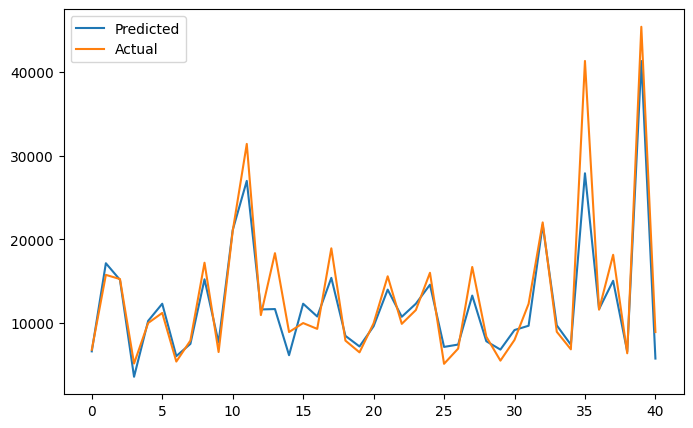

In [69]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()